### Regression-model-from-scratch-to-deployment

In [25]:
# importing the neccessary libraries
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from pathlib import Path

In [26]:
# data preprocessing
weight = 0.2
bias = 0

X = torch.arange(0, 10, 0.05).unsqueeze(dim=1)
y = weight*X + bias

X, y

(tensor([[0.0000],
         [0.0500],
         [0.1000],
         [0.1500],
         [0.2000],
         [0.2500],
         [0.3000],
         [0.3500],
         [0.4000],
         [0.4500],
         [0.5000],
         [0.5500],
         [0.6000],
         [0.6500],
         [0.7000],
         [0.7500],
         [0.8000],
         [0.8500],
         [0.9000],
         [0.9500],
         [1.0000],
         [1.0500],
         [1.1000],
         [1.1500],
         [1.2000],
         [1.2500],
         [1.3000],
         [1.3500],
         [1.4000],
         [1.4500],
         [1.5000],
         [1.5500],
         [1.6000],
         [1.6500],
         [1.7000],
         [1.7500],
         [1.8000],
         [1.8500],
         [1.9000],
         [1.9500],
         [2.0000],
         [2.0500],
         [2.1000],
         [2.1500],
         [2.2000],
         [2.2500],
         [2.3000],
         [2.3500],
         [2.4000],
         [2.4500],
         [2.5000],
         [2.5500],
         [2.

In [27]:
# train-test split
train_test_split = int(0.8*len(X))
X_train, y_train = X[:train_test_split], y[:train_test_split]
X_test, y_test = X[train_test_split:], y[train_test_split:]
len(X_train), len(y_train)

(160, 160)

In [28]:
# Data visualization
def plotpredictions(train_data=X_train,
                    train_label=y_train,
                    test_data=X_test,
                    test_label=y_test,
                    predictions=None):
    plt.figure(figsize=(16,9))
    plt.scatter(train_data, train_label, c="g", s=4, label="TRAIN DATA")
    plt.scatter(test_data, test_label, c="b", s=4, label="TEST DATA")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="y", s=4, label="PREDICTIONS")
    plt.legend()
    plt.show()

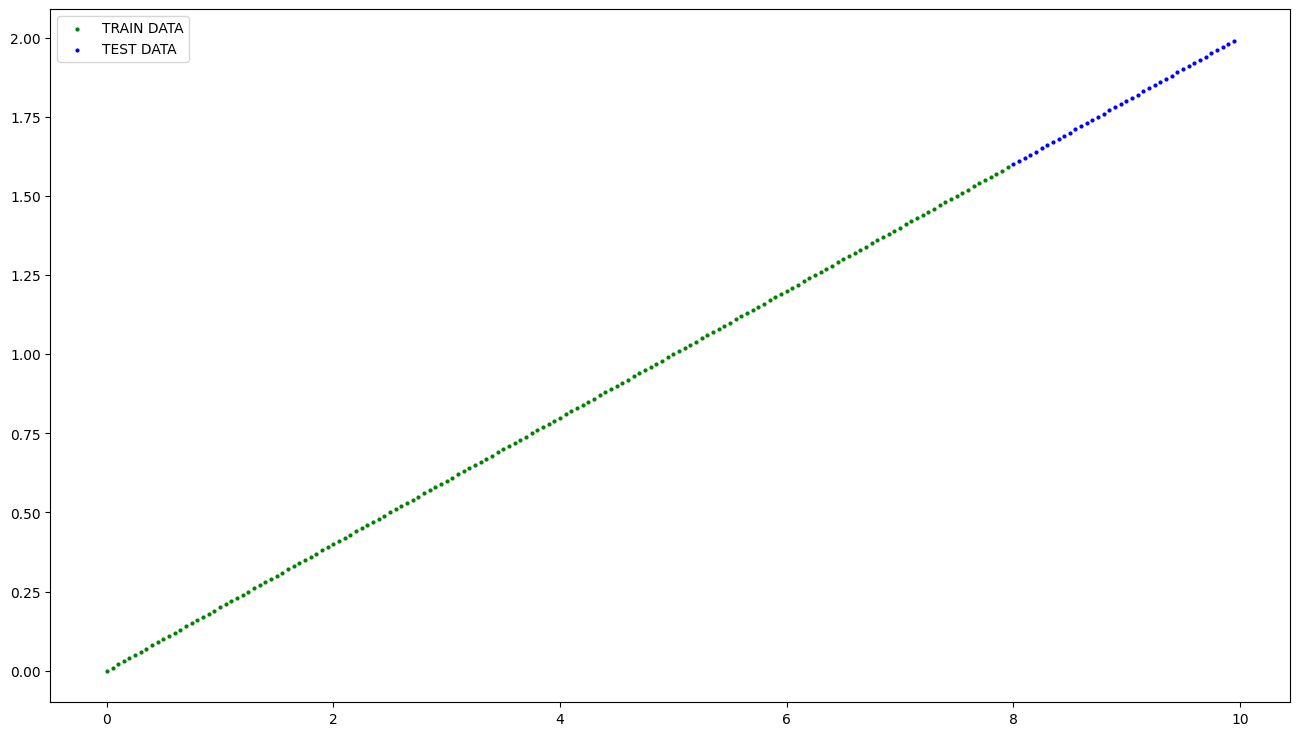

In [29]:
plotpredictions()

In [30]:
# Model architecture
class RegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(1,5)
        self.l2 = nn.Linear(5,1)
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.l1(x)
        x = self.l2(x)
        return x


In [31]:
torch.manual_seed(42)
model1 = RegressionModel()
model1.state_dict()

OrderedDict([('l1.weight',
              tensor([[ 0.7645],
                      [ 0.8300],
                      [-0.2343],
                      [ 0.9186],
                      [-0.2191]])),
             ('l1.bias',
              tensor([ 0.2018, -0.4869,  0.5873,  0.8815, -0.7336])),
             ('l2.weight', tensor([[0.3887, 0.0837, 0.3304, 0.0606, 0.2156]])),
             ('l2.bias', tensor([-0.0631]))])

In [32]:
loss_func = nn.L1Loss()
optimizer = torch.optim.SGD(params=model1.parameters(),
                            lr=0.001)

In [33]:
# training loop 
EPOCHS = 10

for EPOCH in range(EPOCHS):
    model1.train()

    pred = model1.forward(X_train)

    train_loss = loss_func(pred, y_train)

    optimizer.zero_grad()

    train_loss.backward()

    optimizer.step()

    model1.eval()

    with torch.inference_mode():
        test_pred = model1.forward(X_test)

        test_loss = loss_func(test_pred, y_test)

    print(f"EPOCH : {EPOCH + 1} | TRAIN LOSS : {train_loss:.2f} | TEST LOSS | {test_loss:.2f}")
    print(f"ACCURACY : {len(test_pred==y_test) / len(y_test)}")


EPOCH : 1 | TRAIN LOSS : 0.45 | TEST LOSS | 0.84
ACCURACY : 1.0
EPOCH : 2 | TRAIN LOSS : 0.40 | TEST LOSS | 0.74
ACCURACY : 1.0
EPOCH : 3 | TRAIN LOSS : 0.36 | TEST LOSS | 0.64
ACCURACY : 1.0
EPOCH : 4 | TRAIN LOSS : 0.31 | TEST LOSS | 0.54
ACCURACY : 1.0
EPOCH : 5 | TRAIN LOSS : 0.26 | TEST LOSS | 0.44
ACCURACY : 1.0
EPOCH : 6 | TRAIN LOSS : 0.21 | TEST LOSS | 0.34
ACCURACY : 1.0
EPOCH : 7 | TRAIN LOSS : 0.17 | TEST LOSS | 0.23
ACCURACY : 1.0
EPOCH : 8 | TRAIN LOSS : 0.12 | TEST LOSS | 0.13
ACCURACY : 1.0
EPOCH : 9 | TRAIN LOSS : 0.07 | TEST LOSS | 0.03
ACCURACY : 1.0
EPOCH : 10 | TRAIN LOSS : 0.02 | TEST LOSS | 0.07
ACCURACY : 1.0


In [34]:
# save the model
MODEL_PATH = Path("Model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "model.pth"

SAVE_MODEL_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model1.state_dict(),
           f=SAVE_MODEL_PATH)

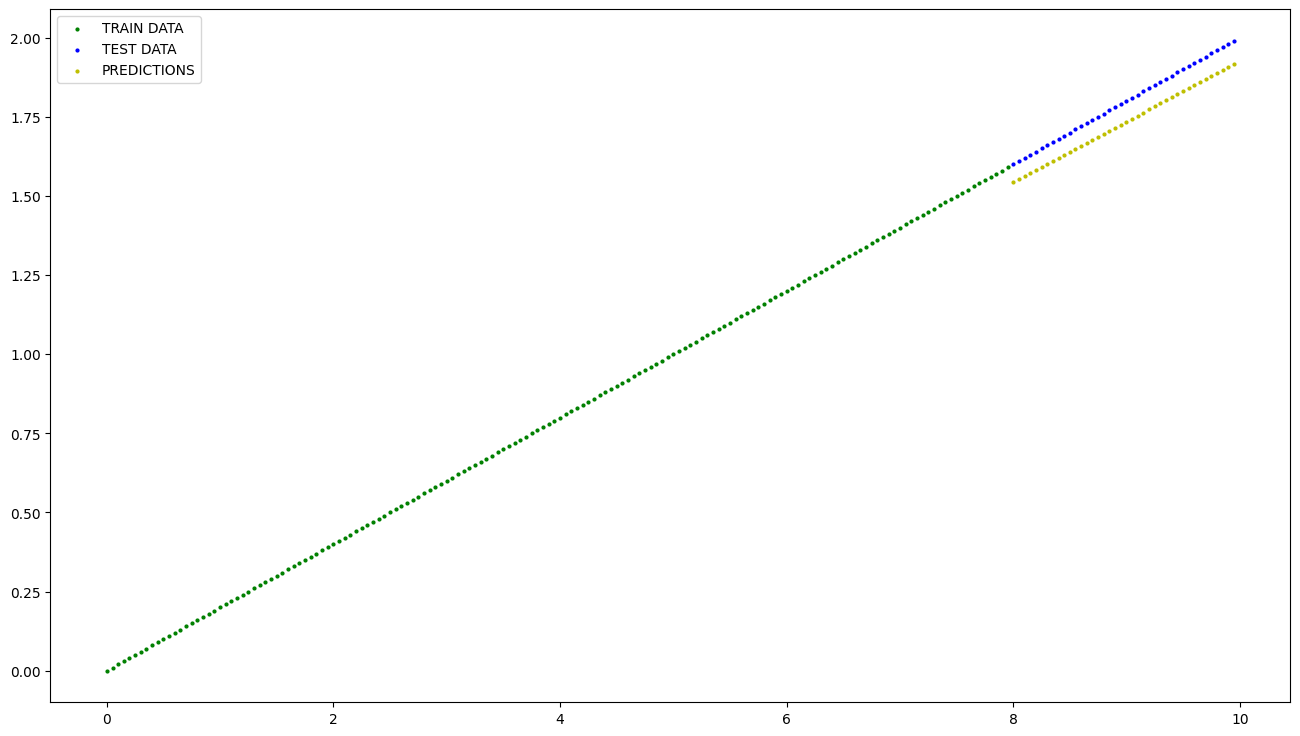

In [35]:
plotpredictions(predictions=test_pred)